In [39]:
import networkx as nx
import operator
import random
import plotly.plotly as py
import plotly.graph_objs as go
from prettytable import PrettyTable

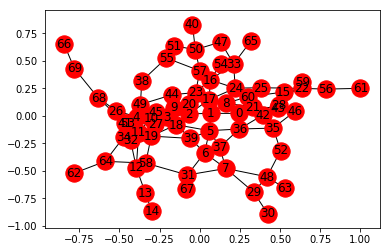

In [7]:
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
nx.draw_networkx(c2c)

In [88]:
#misure di centralità 
def measures(G):
    degree_dic={}
    ev_dic={}
    clos_dic={}
    bet_dic={}
    page_dic={}
    clus_dic={}
    num_nodes=nx.number_of_nodes(G)
    degree=nx.degree_centrality(G)
    eigenvector=nx.eigenvector_centrality(G,weight='weight')
    closeness=nx.closeness_centrality(G,normalized=True)
    betweenness=nx.betweenness_centrality(G,weight='weight')
    pagerank=nx.pagerank(G,weight='weight')
    cluster=nx.clustering(G,weight='weight')
    for i in range(num_nodes):
        if str(i) in degree.keys():
            degree_dic[i]=degree[str(i)]
        if str(i) in eigenvector.keys():
            ev_dic[i]=eigenvector[str(i)]
        if str(i) in closeness.keys():
            clos_dic[i]=closeness[str(i)]
        if str(i) in betweenness.keys():
            bet_dic[i]=betweenness[str(i)]
        if str(i) in pagerank.keys():
            page_dic[i]=pagerank[str(i)]
        if str(i) in cluster.keys():
            clus_dic[i]=cluster[str(i)]
    return degree_dic,ev_dic,clos_dic,bet_dic,page_dic,clus_dic

def list_clustering(G):
    clus_dic={}
    num_nodes=nx.number_of_nodes(G)
    cluster=nx.clustering(G)
    for i in range(num_nodes):
        if str(i) in cluster.keys():
            clus_dic[i]=cluster[str(i)]
    return clus_dic

def list_pagerank(G):
    page_dic={}
    num_nodes=nx.number_of_nodes(G)
    pr=nx.pagerank(G)
    for i in range(num_nodes):
        if str(i) in pr.keys():
            page_dic[i]=pr[str(i)]
    return page_dic

def list_degree(G):
    degree_dic={}
    num_nodes=nx.number_of_nodes(G)
    degree=nx.degree_centrality(G)
    for i in range(num_nodes):
        if str(i) in degree.keys():
            degree_dic[i]=degree[str(i)]
    return degree_dic

def list_closeness(G):
    c_dic={}
    num_nodes=nx.number_of_nodes(G)
    closeness=nx.closeness_centrality(G,normalized=True)
    for i in range(num_nodes):
        if str(i) in closeness.keys():
            c_dic[i]=closeness[str(i)]
    return c_dic

def list_betweenness(G):
    b_dic={}
    num_nodes=nx.number_of_nodes(G)
    betweenness=nx.betweenness_centrality(G,weight='weight')
    for i in range(num_nodes):
        if str(i) in betweenness.keys():
            b_dic[i]=betweenness[str(i)]
    return b_dic
   
def list_eigenvector(G):
    e_dic={}
    num_nodes=nx.number_of_nodes(G)
    eigenvector=nx.eigenvector_centrality_numpy(G,weight='weight')
    for i in range(num_nodes):
        if str(i) in eigenvector.keys():
            e_dic[i]=eigenvector[str(i)]
    return e_dic

def list_degree_average(G):
    davg_dic={}
    num_nodes=nx.number_of_nodes(G)
    degree=nx.k_nearest_neighbors(G, weight='weight')
    for i in range(num_nodes):
        if str(i) in degree.keys():
            davg_dic[i]=degree[str(i)]
    return davg_dic

#crea una lista ordinata in modo decrescente
def ranking_nodes(measure):
    tmp= sorted_x = sorted(measure.items(), key=lambda kv: kv[1])
    tmp=tmp[::-1]
    return [i[0] for i in tmp]



In [9]:
#attacchi 
   
def set_rank_attack(G,ranking,dimension):
    N=nx.number_of_nodes(G)
    S=[100]
    #esegue gli attacchi
    for i in range(dimension):
        #nodi della max componente connessa 
        nodes = map(int, list(G.nodes))
        
        #prende max node presente nella componente connessa
        node=next(x for x in ranking if x in nodes )
        
        #print(node)
        G.remove_node(str(node))
        
        #prende nuova max componente connessa
        G = max(nx.connected_component_subgraphs(G), key=len)
        S.append((float(nx.number_of_nodes(G))/N)*100)
        if len(G.nodes) ==1:
            return S
        
    return S

def update_rank_attack(G,dimension,measure):
    N=nx.number_of_nodes(G)
    S=[100]
   
    #esegue gli attacchi
    for i in range(dimension):
        if measure =='degree':
            centrality=list_degree(G)
        elif measure =='closeness':
            centrality=list_closeness(G)
        elif measure =='betweenness':
            centrality=list_betweenness(G)
        elif measure =='eigenvector':
            centrality=list_eigenvector(G)
        elif measure =='pagerank':
            centrality=list_pagerank(G)
        elif measure =='clustering':
            centrality=list_clustering(G)
        else :
            return -1
        if ranking_nodes(centrality) ==[]:
            S.append(1)
            return S
        max_measure=ranking_nodes(centrality)[0]
        node=max_measure
        G.remove_node(str(node))
        #prende nuova max componente connessa
        G = max(nx.connected_component_subgraphs(G), key=len)
        S.append((float(nx.number_of_nodes(G))/N)*100)
        if len(G.nodes) ==1:
            return S
    return S

def random_vertex(G,dimension):
    N=nx.number_of_nodes(G)
    S=[100]
    #esegue gli attacchi
    for i in range(dimension):
        node=int(random.choice(list(G.nodes)))
    
        G.remove_node(str(node))
        #prende max componente connessa
        G = max(nx.connected_component_subgraphs(G), key=len)
        S.append((float(nx.number_of_nodes(G))/N)*100)
        if len(G.nodes) ==1:
            return S
    return S 

def random_neighbor(G,dimension):
    N=nx.number_of_nodes(G)
    S=[100]
    #esegue gli attacchi
    for i in range(dimension):
        node=int(random.choice(list(G.nodes)))
        neighbor=int(random.choice(list(G.neighbors(str(node)))))
        G.remove_node(str(neighbor))
        #prende max componente connessa
        G = max(nx.connected_component_subgraphs(G), key=len)
        S.append((float(nx.number_of_nodes(G))/N)*100)
        if len(G.nodes) ==1:
            return S
    
    return S   
        

In [10]:
random.seed(237)
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
Rn=random_neighbor(c2c,40)
# Create traces
trace0 = go.Scatter(
    x = range(1,100),
    y = Rn,
    mode = 'lines',
    name = 'RN'
)
data = [trace0]

py.iplot(data, filename='line-mode')

In [11]:
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
degree,eigen,closeness,betweenness,pagerank,clustering=measures(c2c)

In [23]:
#random.seed(237)
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
S=random_vertex(c2c,40)

In [24]:
# Create traces
trace0 = go.Scatter(
    x = range(1,100),
    y = S,
    mode = 'lines',
    name = 'RV'
)
data = [trace0]

py.iplot(data, filename='line-mode')

In [14]:

c2c = nx.read_gml("./data/graphs/net_c2c.gml")
rank_degree=ranking_nodes(degree)
R=set_rank_attack(c2c,rank_degree,40)

c2c = nx.read_gml("./data/graphs/net_c2c.gml")
rank_eigen=ranking_nodes(eigen)
R1=set_rank_attack(c2c,rank_eigen,40)

c2c = nx.read_gml("./data/graphs/net_c2c.gml")
rank_closeness=ranking_nodes(closeness)
R2=set_rank_attack(c2c,rank_closeness,40)

c2c = nx.read_gml("./data/graphs/net_c2c.gml")
rank_bet=ranking_nodes(betweenness)
R3=set_rank_attack(c2c,rank_bet,40)

c2c = nx.read_gml("./data/graphs/net_c2c.gml")
rank_pagerank=ranking_nodes(pagerank)
R4=set_rank_attack(c2c,rank_pagerank,40)

c2c = nx.read_gml("./data/graphs/net_c2c.gml")
rank_cluster=ranking_nodes(clustering)
R5=set_rank_attack(c2c,rank_cluster,40)

In [15]:
# Create traces
trace0 = go.Scatter(
    x = range(1,100),
    y = R,
    mode = 'lines',
    name = 'degree_i'
)

trace1 = go.Scatter(
    x = range(1,100),
    y = R1,
    mode = 'lines',
    name = 'eigenvector_i'
)
trace2 = go.Scatter(
    x = range(1,100),
    y = R2,
    mode = 'lines',
    name = 'closeness_i'
)
trace3 = go.Scatter(
    x = range(1,100),
    y = R3,
    mode = 'lines',
    name = 'betweenness_i'
)
trace4 = go.Scatter(
    x = range(1,100),
    y = R4,
    mode = 'lines',
    name = 'pagerank_i'
)
trace5 = go.Scatter(
    x = range(1,100),
    y = R5,
    mode = 'lines',
    name = 'clustering_i'
)
data = [trace0,trace1,trace2,trace3,trace4,trace5]

py.iplot(data, filename='line-mode')

In [16]:
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
U=update_rank_attack(c2c,40,'degree')
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
U1=update_rank_attack(c2c,40,'closeness')
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
U2=update_rank_attack(c2c,40,'betweenness')
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
U3=update_rank_attack(c2c,40,'eigenvector')
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
U4=update_rank_attack(c2c,40,'pagerank')
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
U5=update_rank_attack(c2c,40,'clustering')

In [17]:
# Create traces
trace0 = go.Scatter(
    x = range(1,100),
    y = U,
    mode = 'lines',
    name = 'degree'
)

trace1 = go.Scatter(
    x = range(1,100),
    y = U1,
    mode = 'lines',
    name = 'closeness'
)
trace2 = go.Scatter(
    x = range(1,100),
    y = U2,
    mode = 'lines',
    name = 'betweenness'
)
trace3 = go.Scatter(
    x = range(1,100),
    y = U3,
    mode = 'lines',
    name = 'eigenvector'
)
trace4 = go.Scatter(
    x = range(1,100),
    y = U4,
    mode = 'lines',
    name = 'pagerank'
)
trace5 = go.Scatter(
    x = range(1,100),
    y = U5,
    mode = 'lines',
    name = 'clustering'
)
data = [trace0,trace1,trace2,trace3,trace4,trace5]

py.iplot(data, filename='line-mode')

In [18]:
def measure_path(G):
    aspl=[]
    for g in nx.connected_component_subgraphs(G):
        aspl.append(nx.average_shortest_path_length(g))
    average_spl=float(sum(aspl))/len(aspl)
    
    average_diameter=[]
    for g in nx.connected_component_subgraphs(G):
        average_diameter.append(nx.diameter(g))
    average_d=float(sum(average_diameter))/len(average_diameter)
    
    return average_spl, average_d
    
    
#calcolo delle misure per i cammini
def update_rank_attack(G,dimension,measure,paths):
    '''
    paths = 1 calcola le misure per i cammini
    '''
    N=nx.number_of_nodes(G)
    S=[100]
    G_copy=G.copy()
    net=[nx.average_shortest_path_length(G)]
    diameter_net=[nx.diameter(G)]
    net_average=[nx.average_shortest_path_length(G)]
    diameter_average=[nx.diameter(G)]
    
    #esegue gli attacchi
    for i in range(dimension):
        if measure =='degree':
            centrality=list_degree(G)
        elif measure =='closeness':
            centrality=list_closeness(G)
        elif measure =='betweenness':
            centrality=list_betweenness(G)
        elif measure =='eigenvector':
            centrality=list_eigenvector(G)
        elif measure =='pagerank':
            centrality=list_pagerank(G)
        elif measure =='clustering':
            centrality=list_clustering(G)
        else :
            return -1
        if ranking_nodes(centrality) ==[]:
            S.append(0)
            if paths==1:
                return S,net,diameter_net,net_average,diameter_average
            else:
                return S
        
        max_measure=ranking_nodes(centrality)[0]
        node=max_measure
        G.remove_node(str(node))
        G_copy.remove_node(str(node))
   
        #prende nuova max componente connessa
        G = max(nx.connected_component_subgraphs(G), key=len)
        if paths==1:
            net.append(nx.average_shortest_path_length(G))
            diameter_net.append(nx.diameter(G))
            short_path, diam_av= measure_path(G_copy)
            net_average.append(short_path)
            diameter_average.append(diam_av)
        
        S.append((float(nx.number_of_nodes(G))/N)*100)
        if len(G.nodes) ==1:
            if paths==1:
                return S,net,diameter_net,net_average,diameter_average
            else:
                return S
    if paths==1:
        return S,net,diameter_net,net_average,diameter_average
    else:
        return S

In [19]:
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
U,spl,diameter,spl_average,diameter_av =update_rank_attack(c2c,40,'degree',1)
# Create traces
trace0 = go.Scatter(
    x = range(1,100),
    y = spl,
    mode = 'lines',
    name = 'average_shortest_path_gcc'
)

trace1 = go.Scatter(
    x = range(1,100),
    y = diameter,
    mode = 'lines',
    name = 'diameter_gcc'
)
trace2 = go.Scatter(
    x = range(1,100),
    y = spl_average,
    mode = 'lines',
    name = 'average_shortest_path_max'
)
trace3 = go.Scatter(
    x = range(1,100),
    y = diameter_av,
    mode = 'lines',
    name = 'diameter_average_max'
)

data = [trace0,trace1,trace2,trace3]

py.iplot(data, filename='line-mode')

Ovviamente, diversi nodi possono avere lo stesso valore con
rispetto a una data caratteristica (ad esempio k, o uno degli indici di centralità).
Quindi, la scelta tra questi nodi è casuale. Per controllare la dispersione di
i risultati, si mostrano i risultati di 10 sequenze di attacco complete per lo
stesso scenario. si mostra la modifica della componente connesso più grande
S di C2C per RV.

In [31]:
attacks_rv=[]
for i in range(10):
    c2c = nx.read_gml("./data/graphs/net_c2c.gml")
    attacks_rv.append(random_vertex(c2c,60))


In [33]:
# Create traces
trace0 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[0],
    mode = 'lines',
    name = 'attack1'
)

trace1 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[1],
    mode = 'lines',
    name = 'attack2'
)
trace2 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[2],
    mode = 'lines',
    name = 'attack3'
)
trace3 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[3],
    mode = 'lines',
    name = 'attack4'
)
trace4 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[4],
    mode = 'lines',
    name = 'attack5'
)
trace5 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[5],
    mode = 'lines',
    name = 'attack6'
)
trace6 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[6],
    mode = 'lines',
    name = 'attack7'
)
trace7 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[7],
    mode = 'lines',
    name = 'attack8'
)
trace8 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[8],
    mode = 'lines',
    name = 'attack9'
)
trace9 = go.Scatter(
    x = range(1,100),
    y = attacks_rv[9],
    mode = 'lines',
    name = 'attack10'
)
data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

py.iplot(data, filename='line-mode')

La dispersione nella componente connessa piu grande S per sequenze di attacchi mirati è minima.
A continuazione si mostrano 10 attacchi in base alla lista di ranking generata con la misura di
centralità closeness (C).

In [36]:
attacks_update=[]
for i in range(10):
    c2c = nx.read_gml("./data/graphs/net_c2c.gml")
    attacks_update.append(update_rank_attack(c2c,40,'closeness',0))

In [43]:
# Create traces
trace0 = go.Scatter(
    x = range(1,100),
    y = attacks_update[0],
    mode = 'lines',
    name = 'attack1'
)

trace1 = go.Scatter(
    x = range(1,100),
    y = attacks_update[1],
    mode = 'lines',
    name = 'attack2'
)
trace2 = go.Scatter(
    x = range(1,100),
    y = attacks_update[2],
    mode = 'lines',
    name = 'attack3'
)
trace3 = go.Scatter(
    x = range(1,100),
    y = attacks_update[3],
    mode = 'lines',
    name = 'attack4'
)
trace4 = go.Scatter(
    x = range(1,100),
    y = attacks_update[4],
    mode = 'lines',
    name = 'attack5'
)
trace5 = go.Scatter(
    x = range(1,100),
    y = attacks_update[5],
    mode = 'lines',
    name = 'attack6'
)
trace6 = go.Scatter(
    x = range(1,100),
    y = attacks_update[6],
    mode = 'lines',
    name = 'attack7'
)
trace7 = go.Scatter(
    x = range(1,100),
    y = attacks_update[7],
    mode = 'lines',
    name = 'attack8'
)
trace8 = go.Scatter(
    x = range(1,100),
    y = attacks_update[8],
    mode = 'lines',
    name = 'attack9'
)
trace9 = go.Scatter(
    x = range(1,100),
    y = attacks_update[9],
    mode = 'lines',
    name = 'attack10'
)
data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

py.iplot(data, filename='line-mode')

In [153]:
def update_degree_attack(G,dimension):
    N=nx.number_of_nodes(G)
    S=[100]
    number_node=[N]
    degree_avg=[round(float(sum(list_degree(G).values()))/len(list_degree(G)),3)]
    c_avg=[round(float(sum(list_closeness(G).values()))/len(list_closeness(G)),3)]
    b_avg=[round(float(sum(list_betweenness(G).values()))/len(list_betweenness(G)),3)]
    pr_avg=[round(float(sum(list_pagerank(G).values()))/len(list_pagerank(G)),3)]
    ev_avg=[round(float(sum(list_eigenvector(G).values()))/len(list_eigenvector(G)),3)]
    short_path=[round(nx.average_shortest_path_length(G),3)]
    diameter=[nx.diameter(G)]
    cluster_avg=[round(float(sum(list_clustering(G).values()))/len(list_clustering(G)),3)]
    #esegue gli attacchi
    for i in range(dimension):
        centrality=list_degree(G)
        if ranking_nodes(centrality)==[]:
            S.append(1)
            return S
        max_measure=ranking_nodes(centrality)[0]
        node=max_measure
        G.remove_node(str(node))
        #prende nuova max componente connessa
        G = max(nx.connected_component_subgraphs(G), key=len)
        number_node.append(nx.number_of_nodes(G))
        degree_avg.append(round(float(sum(list_degree(G).values()))/len(list_degree(G)),3))
        c_avg.append(round(float(sum(list_closeness(G).values()))/len(list_closeness(G)),3))
        b_avg.append(round(float(sum(list_betweenness(G).values()))/len(list_betweenness(G)),3))
        pr_avg.append(round(float(sum(list_pagerank(G).values()))/len(list_pagerank(G)),3))
        ev_avg.append(round(float(sum(list_eigenvector(G).values()))/len(list_eigenvector(G)),3))
        short_path.append(round(nx.average_shortest_path_length(G),3))
        diameter.append(nx.diameter(G))
        cluster_avg.append(round(float(sum(list_clustering(G).values()))/len(list_clustering(G)),3))
        S.append(round(((float(nx.number_of_nodes(G))/N)*100),3))
        if len(G.nodes) ==1:
            return S
    return S,number_node, degree_avg, c_avg, b_avg, pr_avg, ev_avg,short_path, diameter, cluster_avg

In [154]:
x = PrettyTable()
c2c = nx.read_gml("./data/graphs/net_c2c.gml")
S,number_node, k_avg,c_avg, b_avg ,pr_avg, ev_avg, short_path, diameter,cluster=update_degree_attack(c2c,10)
x_n = ["c", "N","k_avg", "diameter","short_path","c_avg","b_avg","pr_avg","ev_avg","cluster","S"]
x.add_column(x_n[0], range(len(S)))
x.add_column(x_n[1], number_node)
x.add_column(x_n[2], k_avg)
x.add_column(x_n[3], diameter)
x.add_column(x_n[4], short_path)
x.add_column(x_n[5], c_avg)
x.add_column(x_n[6], b_avg)
x.add_column(x_n[7], pr_avg)
x.add_column(x_n[8], ev_avg)
x.add_column(x_n[9], cluster)
x.add_column(x_n[10], S)
print(x)

+----+----+-------+----------+------------+-------+-------+--------+--------+---------+--------+
| c  | N  | k_avg | diameter | short_path | c_avg | b_avg | pr_avg | ev_avg | cluster |   S    |
+----+----+-------+----------+------------+-------+-------+--------+--------+---------+--------+
| 0  | 70 | 0.053 |    12    |    4.88    | 0.213 |  0.07 | 0.014  | 0.055  |  0.215  |  100   |
| 1  | 69 | 0.052 |    13    |    5.05    | 0.206 | 0.073 | 0.015  | 0.054  |  0.208  | 98.571 |
| 2  | 68 | 0.051 |    13    |   5.121    | 0.203 | 0.076 | 0.015  | 0.054  |  0.197  | 97.143 |
| 3  | 67 |  0.05 |    13    |   5.222    |  0.2  | 0.081 | 0.015  | 0.055  |  0.191  | 95.714 |
| 4  | 66 | 0.049 |    13    |   5.279    | 0.198 | 0.084 | 0.015  | 0.058  |  0.181  | 94.286 |
| 5  | 65 | 0.048 |    13    |   5.449    | 0.192 |  0.09 | 0.016  | 0.056  |  0.171  | 92.857 |
| 6  | 64 | 0.047 |    13    |   5.499    |  0.19 | 0.091 | 0.016  | 0.054  |  0.163  | 91.429 |
| 7  | 63 | 0.047 |    13    |